In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

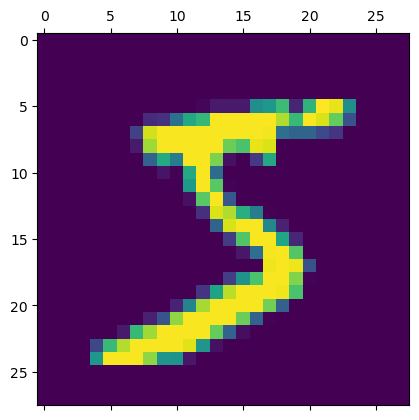

In [7]:
plt.matshow(X_train[0]);

In [8]:
y_train[0]

5

## Scaling

In [9]:
X_train=X_train/255
X_test=X_test/255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Model Building

In [11]:

model=keras.Sequential([
    
    keras.layers.Flatten(input_shape=(28,28)),
   
    keras.layers.Dense(100,activation='relu'),# 100 - number of hidden nurons(we get count based on trial and error)
  
    keras.layers.Dense(10,activation='sigmoid')
])


model.compile(optimizer='SGD',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )


model.fit(X_train,y_train,epochs=11)



Epoch 1/11


1875/1875 [==============================] - 6s 3ms/step - loss: 0.6553 - accuracy: 0.8354
Epoch 2/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3407 - accuracy: 0.9045
Epoch 3/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2922 - accuracy: 0.9173
Epoch 4/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2614 - accuracy: 0.9268
Epoch 5/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2386 - accuracy: 0.9329
Epoch 6/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2205 - accuracy: 0.9382
Epoch 7/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2053 - accuracy: 0.9430
Epoch 8/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1924 - accuracy: 0.9459
Epoch 9/11
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1811 - accuracy: 0.9489
Epoch 10/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0

## Evaluate the Model

In [12]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1609 - accuracy: 0.9539


[0.1609245240688324, 0.9538999795913696]

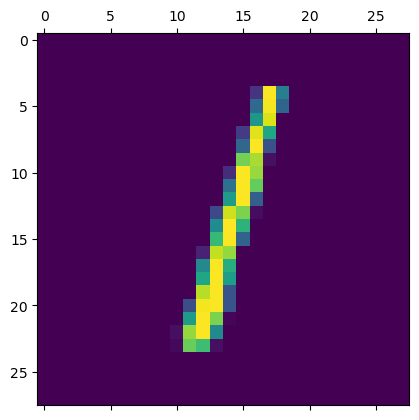

In [13]:
plt.matshow(X_test[2])

In [14]:
y_predicted=model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [15]:
y_predicted[0]

array([5.2010149e-01, 4.3869745e-03, 9.6216500e-01, 9.8744434e-01,
       2.3098757e-02, 5.9753960e-01, 5.7420220e-05, 9.9996620e-01,
       3.9942136e-01, 8.5733849e-01], dtype=float32)

In [21]:
np.argmax(y_predicted[2])

1

In [17]:
y_pred=[np.argmax(i) for i in y_predicted]

In [18]:
y_pred[:5]

[7, 2, 1, 0, 4]

In [19]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    0,    0,    3,    6,    1,    2,    0],
       [   0, 1115,    4,    1,    1,    1,    3,    2,    8,    0],
       [   6,    6,  979,    5,    5,    2,    7,    9,   12,    1],
       [   0,    1,   10,  951,    1,   20,    0,   10,   12,    5],
       [   1,    1,    4,    0,  940,    0,   12,    1,    4,   19],
       [   9,    2,    1,   15,    1,  839,   12,    1,    8,    4],
       [   9,    3,    1,    0,    6,    9,  926,    1,    3,    0],
       [   2,    8,   18,    4,    6,    2,    0,  972,    2,   14],
       [   4,    5,    4,   11,    7,    8,    9,    9,  916,    1],
       [  10,    7,    1,   10,   26,    7,    1,    7,    6,  934]])>

Text(95.72222222222221, 0.5, 'Truth')

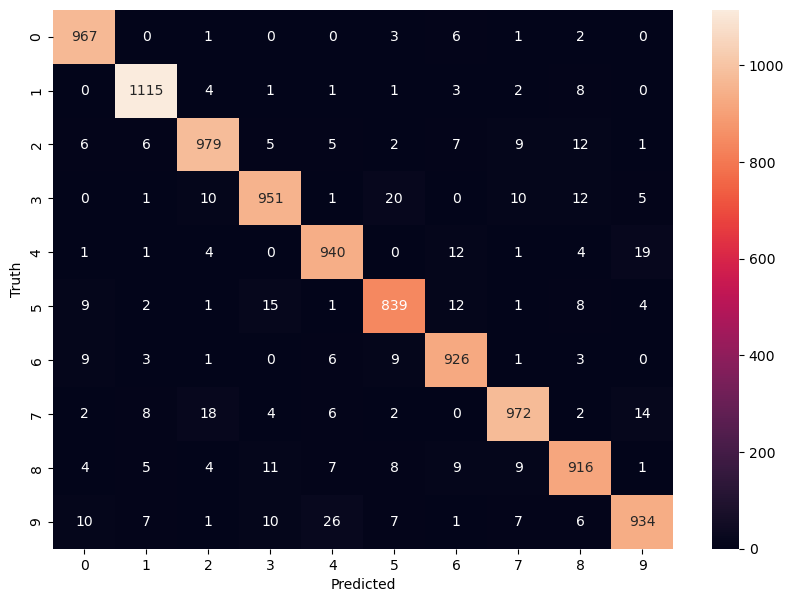

In [20]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel('Truth')